<h1>Open Haloscope</h1>
<h2>Expected axion sensitivity and signal-to-noise ratio</h2>

The signal is calculated with the axion parameters stored in the json file.

<h4>Imports</h4>

In [1]:
import sys
sys.path.append(r"C:\Users\nicol\Progetti\Open Haloscope\lib")
experiments_folder = r"C:\Users\nicol\Progetti\Open Haloscope/data/experiments/"

#sys.path.append('/Users/ncr/Desktop/Progetti/Open-Haloscope/lib')
#experiments_folder = '/Users/ncr/Desktop/Progetti/Open-Haloscope/data/experiments/'

In [2]:
import numpy as np
from scipy import constants as c
import matplotlib.pyplot as plt

# plot options
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size=14)
#%config InlineBackend.figure_format='retina'

In [3]:
# Particles
import open_haloscope.particles as particles
ax = particles.DMAxion()

# Experiment
import open_haloscope.experiment as experiment
haloscope_json = experiments_folder + 'kakapo_haloscope.json'
H = experiment.FermionicHaloscope(haloscope_json)

<h3>Axions</h3>

In [4]:
ax.print_axion_parameters()

Local dark matter density: 0.4 GeV/cm3
Relative speed of the dark matter wind: 0.001c = 299792.458 m/s
DFSZ axion coupling: 8.943e-11/mass, with upper limit 0.3 and lower limit 2e-05


In [5]:
# axion
m_a = 40e-6 # axion mass in eV
f_a = ax.eV_to_Hz(m_a)
omega_a = 2*np.pi * f_a

# effective axion field
b_a = ax.effective_field(m_a)

<h3>Haloscope</h3>

In [6]:
H.experiment_parameters

{'_parameters_Kakapo': 'Parameters used in the fermionic haloscope Kakapo',
 'haloscope_name': 'kakapo',
 'f': 5500000.0,
 'Q': 100,
 'f1': 5454690.349638967,
 'k1': 19403.521819088724,
 'f2': 5630663.245536586,
 'k2': 21375.62670037539,
 'An': 1e-05,
 'Ap': 1.0,
 'operating_frequency': 'MHz',
 'material_used': 'NiZn ferrite',
 'data_path': 'Open Haloscope\\data\\runs\\',
 'logs_path': 'Open Haloscope\\data\\logs\\',
 'redpitaya_eth0_ip': 'TCPIP::169.254.33.148::5000::SOCKET',
 'redpitaya_wlan_ip': 'TCPIP::192.168.1.30::5000::SOCKET'}

In [7]:
p = H.sensitivity_parameters
b_min = H.get_b_sensitivity(**p)
b_min

1.7669039506659686e-11

<h3>Sensitivity and limits</h3>

Text(0, 0.5, '$|g_p|$')

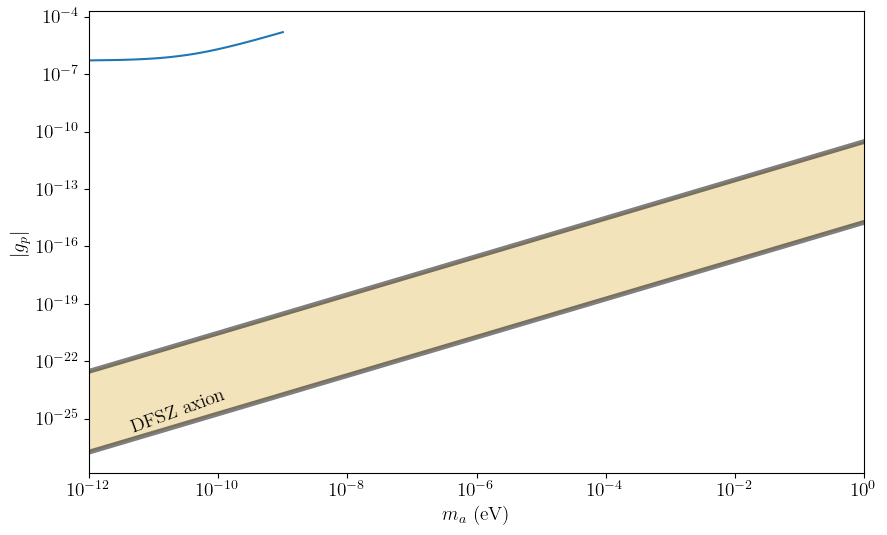

In [10]:
plt.figure(figsize=(10,6))

mass_start = 1e-12
mass_stop = 1
mass_points = 10001
m_range = np.logspace(np.log10(mass_start), np.log10(mass_stop), mass_points)

ax.plot_DFSZ_axion(m_range)
# just some random numbers to see an upper limit
plt.plot(np.linspace(1e-12, 1e-9, 1001), ax.field_to_g_p(np.linspace(b_min/300, b_min*1e-1, 1001)))

plt.xlim(mass_start, mass_stop)

plt.xlabel('$m_a$ (eV)')
plt.ylabel('$|g_p|$')